# ATOC5860 - ftest - Lecture #3
##### Coded and Munged by Prof. Jen Kay (CU)
##### Last updated: January 30, 2023

In [1]:
### GENERAL SETUP
%matplotlib inline  
# this enables plotting within notebook

import matplotlib   # library for plotting
import matplotlib.pyplot as plt #  later you will type plt.$COMMAND
import numpy as np   # basic math library  you will type np.$STUFF  e.g., np.cos(1)
import pandas as pd  # library for data analysis for text files (everything but netcdf files)
import scipy.stats as stats # imports stats functions https://docs.scipy.org/doc/scipy/reference/stats.html 
import xarray as xr # use for slick netcdf data analysis

In [2]:
### global mean temperature from the CESM1 1850 control run
ds1=xr.open_dataset("TS_timeseries_cesmle_1850.nc")
data=ds1["gts_annual"]

In [3]:
print(data.values)
print(data.year)

[286.95007 286.96375 287.027   ... 287.00504 287.17413 287.1163 ]
<xarray.DataArray 'year' (year: 1801)>
array([   1,    2,    3, ..., 1799, 1800, 1801], dtype=int32)
Coordinates:
  * year     (year) int32 1 2 3 4 5 6 7 8 ... 1795 1796 1797 1798 1799 1800 1801


(1801,)
(1801,)


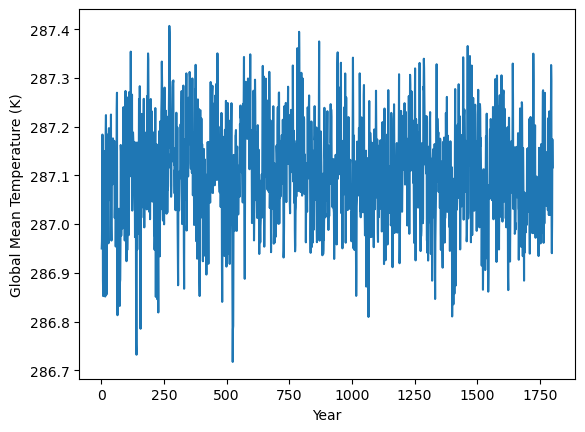

In [4]:
### Let's make a plot of the data... Remember "Look at your data"!!
year=data.year
print(year.shape)
print(data.shape)

plt.plot(year, data);
plt.xlabel('Year');
plt.ylabel('Global Mean Temperature (K)');

In [9]:
## We want to test if the variance for years 1-100 differs from the variance for years 501-600
## Create two variables (data1, data2) to calculate statistics from these two periods

data1=data.sel(year=slice(1,100))
data2=data.sel(year=slice(501,600))
print(data1.year)
print(data2.year)
print(data1.shape)
print(data2.shape)

<xarray.DataArray 'year' (year: 100)>
array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100], dtype=int32)
Coordinates:
  * year     (year) int32 1 2 3 4 5 6 7 8 9 10 ... 92 93 94 95 96 97 98 99 100
<xarray.DataArray 'year' (year: 100)>
array([501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514,
       515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528,
       529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542,
       543, 544, 545, 546, 547,

In [6]:
### calculate mean, std, and N for each period
sample_mean1=data1.mean()
sample_mean2=data2.mean()
sample_std1=data1.std()
sample_std2=data2.std()
N1=len(data1)
N2=len(data2)
print('Sample1 mean 1920-1963: ',np.round(sample_mean1.values,2))
print('Sample2 mean 1963-2006: ',np.round(sample_mean2.values,2))
print('Sample1 std 1920-1963: ',np.round(sample_std1.values,2))
print('Sample2 std 1963-2006: ',np.round(sample_std2.values,2))
print('Sample1 N 1920-1963: ',np.round(N1,2))
print('Sample2 N 1963-2006: ',np.round(N2,2))

Sample1 mean 1920-1963:  287.06
Sample2 mean 1963-2006:  287.12
Sample1 std 1920-1963:  0.11
Sample2 std 1963-2006:  0.12
Sample1 N 1920-1963:  100
Sample2 N 1963-2006:  100


In [7]:
## First we will test the python function to make sure we get the same value as in the f-table in Barnes.  
## F-distribution critical value for alpha=0.05, numerator DF=denominator DF = 60.  
## we should get fcrit=1.5343.  Looks good!
fcrit_test = stats.f.ppf(q = 0.95, dfn = 60, dfd = 60)
print(np.round(fcrit_test,4))

fcrit_test = stats.f.ppf(q = 0.95, dfn = 10, dfd = 500)
print(np.round(fcrit_test,4))

1.5343
1.8496


In [8]:
### Hypothesis testing
# Step #1: State significance level. alpha=0.05; 95% confidence
# Step #2: Null Hypothesis -- The standard deviation for period 1 (1920-1963) and period 2 (1963-2006) are the same.
# Step #3: We will use the f-statistic.  We will assume data1 and data2 come from normal populations having the same
# true variance.
# Step #4: Find critical value to exceed to reject the null hypothsis (fcrit)
# Now find the critical f value for our problem.  If our calculated F statistic is less than fcrit - 
# we fail to reject our null hypothesis
fcrit = stats.f.ppf(q = 0.95, dfn = N1-1, dfd = N2-1)
print(f'fcrit: {np.round(fcrit,3)}')
# Step #5: Calculate f statistic 
## NOTE - the larger variance always goes on TOP, the smaller variance always goes on BOTTOM.
## More info here: http://staff.washington.edu/tabrooks/599.course/Ftest.html and at 
## The F test for variances - An Explanation.pdf (Notes included with this lecture).
## In this case sample_std2 > sample_std1 -- so sample_std2 goes on the top, sample_std1 on the bottom.
f=sample_std2**2/sample_std1**2
print(f'f: {np.round(f.values,3)}')
### Assess findings. 
if f<fcrit:
    print('SUMMARY: f<fcrit so we cannot reject our null hypothesis that period1 and period2 have the same variance')
elif f>fcrit:
    print('SUMMARY: f>fcrit so we can reject our null hypothesis that period1 and period2 have the same variance')

fcrit: 1.394
f: 1.215
SUMMARY: f<fcrit so we cannot reject our null hypothesis that period1 and period2 have the same variance
